<a href="https://colab.research.google.com/github/tuyen23122002/demo-github/blob/master/YoLov7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/yolov7_train
! git clone https://github.com/WongKinYiu/yolov7

In [ ]:
# cai dat thu vien
%cd /content/drive/MyDrive/yolov7_train/yolov7
! pip install -r requirements.txt

In [3]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!mkdir pretrain
%cd pretrain
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

200 OK
Length: 75587165 (72M) [application/octet-stream]
Saving to: ‘yolov7.pt.1’

yolov7.pt.1         100%[===================>]  72.08M  65.3MB/s    in 1.1s    

2023-12-16 10:11:30 (65.3 MB/s) - ‘yolov7.pt.1’ saved [75587165/75587165]



In [ ]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!mkdir test_image
%cd test_image
!wget https://media.bongda.com.vn/files/toan.vu/2020/03/09/1-1623.jpg
!wget https://media.baodautu.vn/Images/manhcuong/2018/04/09/giai-phap-tan-goc-cua-van-de-giam-un-tac-giao-thong1523212910.jpg
!wget https://image.tienphong.vn/w890/Uploaded/2023/vjwqcqjwp/2020_04_22/93806159_244802399972350_5949458246824624128_n_SPKP.jpg

In [ ]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights pretrain/yolov7.pt --source test_image/giai-phap-tan-goc-cua-van-de-giam-un-tac-giao-thong1523212910.jpg

# Train Model

In [ ]:
# Giải nén dữ liệu để train model
%cd /content/drive/MyDrive/yolov7_train
!mkdir train_data
%cd train_data
!unzip ../firedata.zip

In [37]:
# To chuc lai file vi yolo 7 yeu cau
# train
#     -image
#     -label
# test
#     -image
#     -label
%cd /content/drive/MyDrive/yolov7_train/train_data
!rm train
!mkdir train/images
!mkdir train/labels
!mv *.jpg train/images
!mv *.txt train/labels

/content/drive/MyDrive/yolov7_train/train_data
rm: cannot remove 'train': Is a directory
mkdir: cannot create directory ‘train/images’: File exists
mkdir: cannot create directory ‘train/labels’: File exists
mv: cannot stat '*.jpg': No such file or directory


In [31]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!echo 'train: ../train_data/train' >> data/mydataset.yaml
!echo 'val: ../train_data/train' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['fire']" >> data/mydataset.yaml

/content/drive/MyDrive/yolov7_train/yolov7


In [1]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 100 --data data/mydataset.yaml --weights 'pretrain/yolov7.pt'

/content/drive/MyDrive/yolov7_train/yolov7
2023-12-16 13:03:38.638559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 13:03:38.638616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 13:03:38.640579: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 13:03:38.651896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-16

In [5]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights /content/drive/MyDrive/yolov7_train/yolov7/runs/train/exp8/weights/last.pt --source test_image/93806159_244802399972350_5949458246824624128_n_SPKP.jpg

/content/drive/MyDrive/yolov7_train/yolov7
Namespace(weights=['/content/drive/MyDrive/yolov7_train/yolov7/runs/train/exp8/weights/last.pt'], source='test_image/93806159_244802399972350_5949458246824624128_n_SPKP.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at 

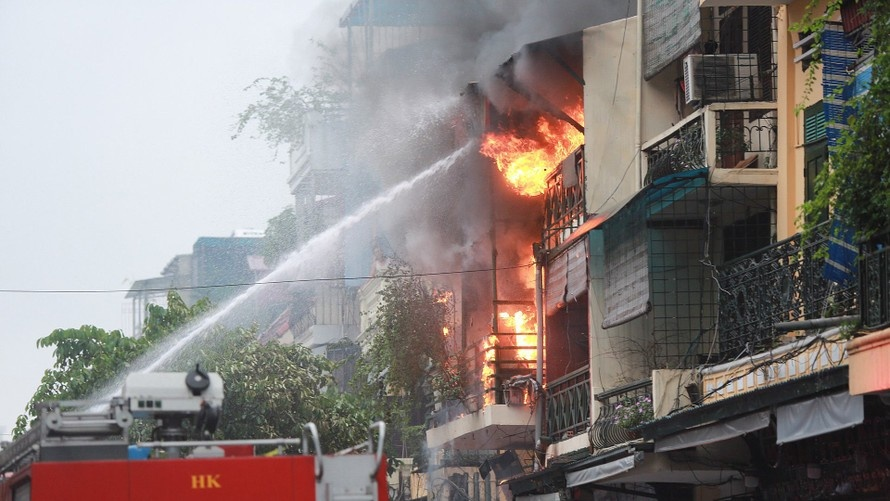

In [6]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7_train/yolov7/runs/detect/exp9/93806159_244802399972350_5949458246824624128_n_SPKP.jpg"))